## Task 2 - To Explore Supervised Machine Learning
In this task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves only two variables.

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the Data
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


(0, 10)

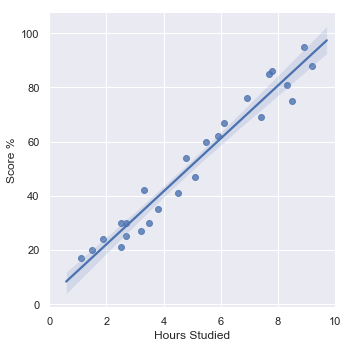

In [4]:
# Visualizing Data along with Regression Line
sns.set()
sns.lmplot(x='Hours',y='Scores',data=data)
plt.xlabel('Hours Studied',fontsize=12)
plt.ylabel('Score %',fontsize=12)
plt.xlim([0,10])

The above plot depicts a strong linear relation between the number of hours a student studies and the percentage of marks he obtains.

## Linear Regression Algorithm

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
# Splitting Data into Test and Training sets
X_train, X_test, y_train, y_test = train_test_split(data.Hours, data.Scores, test_size=0.2, random_state=0)

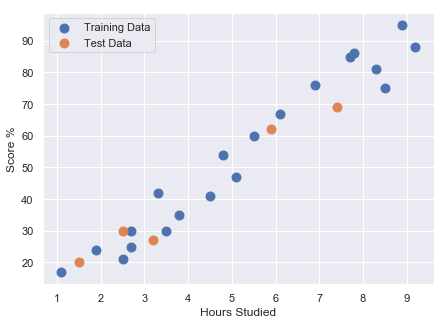

In [7]:
# Visualization of the above split into Test and Training data
plt.figure(figsize=(7,5))
plt.scatter(X_train,y_train,label='Training Data',s=80)
plt.scatter(X_test,y_test,label='Test Data',s=80)
plt.xlabel('Hours Studied')
plt.ylabel('Score %')
plt.legend()

In [8]:
# Training the model
lr=LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train.values)
print("The model is trained.")

The model is trained.


In [9]:
# Comparing Predicted v/s Actual Values
y_pred=lr.predict(X_test.values.reshape(-1,1))
value=pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
value

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


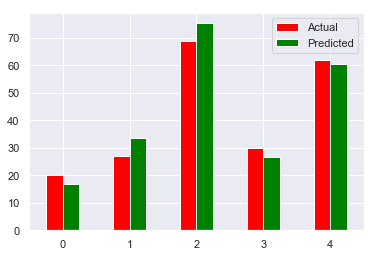

In [10]:
# Visualizing the above comparison
value.plot.bar(rot=0,color=('red','green'))

In [11]:
# Accuracy of the model
acc=lr.score(X_test.values.reshape(-1,1),y_test.values)
print("The accuracy of the model is {} % ".format(round(acc*100,4)))

The accuracy of the model is 94.5491 % 


In [12]:
# Making Prediction for given value
import numpy as np
a=np.array([9.25])
pred=lr.predict(a.reshape(-1,1))
print("According to this model, the percentage marks scored by a student who studies for 9.25 hours will be {} %".format(round(pred[0],4)))

According to this model, the percentage marks scored by a student who studies for 9.25 hours will be 93.6917 %


In [13]:
# Evaluating the model with various metrics
from sklearn import metrics
print("MAE error of the model is",metrics.mean_absolute_error(y_test.values,y_pred))
print("MSE error of the model is",metrics.mean_squared_error(y_test.values,y_pred))
print("RMSE error of the model is",np.sqrt(metrics.mean_squared_error(y_test.values,y_pred)))


MAE error of the model is 4.183859899002975
MSE error of the model is 21.5987693072174
RMSE error of the model is 4.6474476121003665
